# Quora Insincere Questions Classification


In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import string
from textblob import Word

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data

In [4]:
train_data=pd.read_csv("/content/drive/MyDrive/Kaggle/Quora/quora-insincere-questions-classification/train.csv")
train_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
#check columns
train_data.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [6]:
#let's check the distribution of traget data
train_data['target'].value_counts(normalize=True,dropna=False)

,proportion
target,
0,0.93813
1,0.06187


The data is highly imbalance

In [7]:
#check target 1 data
train_data[train_data['target']==1]['question_text'].values[0]

'Has the United States become the largest dictatorship in the world?'

In [8]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#create set of stops words and punctuation marks
stop=set(stopwords.words('english'))
punctuations=list(string.punctuation)
stop.update(punctuations)
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [10]:
#let's do lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
#check lemmatizer
lemmatizer.lemmatize('stopiness')

'stopiness'

In [14]:
#create function for cleaning text

def cleaning_text(text):
  text=text.lower()
  text=[i for i in word_tokenize(text) if i not in stop]
  for i in range(len(text)):
    text[i]=lemmatizer.lemmatize(text[i])
  text=' '.join(text)
  return text

In [16]:
>>> import nltk
>>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
train_data['cleaned_text']=train_data['question_text'].apply(cleaning_text)
train_data

,qid,question_text,target,cleaned_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation 1960s
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...
...,...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0,technical skill need computer science undergra...
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0,m ece good job prospect usa like india job pre...
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0,foam insulation toxic
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0,one start research project based biochemistry ...


In [18]:
#create function to split the text

def split_text(text):
  text=text.split(" ")
  return len(text)

In [19]:
train_data['length']=train_data['cleaned_text'].apply(split_text)
train_data.head()

,qid,question_text,target,cleaned_text,length
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation 1960s,6
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt shop,7
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...,7
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere,6
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...,7


In [20]:
#check min and max length of the text
max(train_data['length']),min(train_data['length'])

(154, 1)

In [21]:
train_data.columns

Index(['qid', 'question_text', 'target', 'cleaned_text', 'length'], dtype='object')

[]

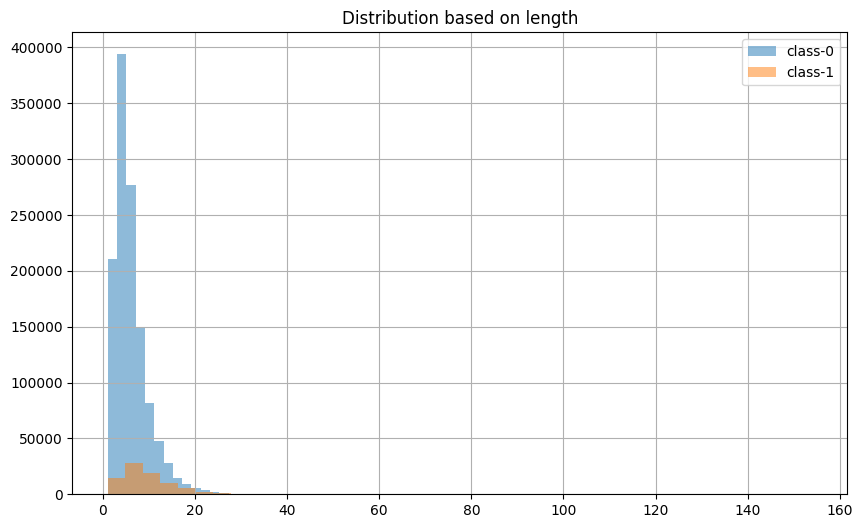

In [26]:
#lets see if our data is seperable by length
plt.figure(figsize=(10,6))
train_data[train_data['target']==0]['length'].hist(bins=40,alpha=0.5,label='class-0')
train_data[train_data['target']==1]['length'].hist(bins=40,alpha=0.5,label='class-1')
plt.legend()
plt.title("Distribution based on length")
plt.plot()


In [27]:
#lets check least frequent word used
freq=pd.Series(' '.join(train_data['cleaned_text']).split()).value_counts()[-100:]
freq

,count
increase/strengthen,1
6^81,1
taleem,1
charset=latin1,1
maharani,1
...,...
gaalib,1
kaha,1
kahi,1
paloma,1


In [28]:
#lets check frequency of most used word
freq=pd.Series(' '.join(train_data['cleaned_text']).split()).value_counts()[:100]
freq

,count
's,70273
get,64742
would,62397
best,62303
people,56663
...,...
language,9272
number,9241
sex,9042
anyone,9034


In [29]:
#check for total unique words
pd.Series(" ".join(train_data['cleaned_text']).split()).nunique()

249173

In [30]:
#our dataset is not seperable by length
#lets use embedding to embed it

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=10000,lowercase=True,analyzer='word',stop_words='english',ngram_range=(1,1))
train_tfidf=tfidf.fit_transform(train_data['cleaned_text'])

In [31]:
#now use train_test_split
from sklearn.model_selection import train_test_split
X_train,X_text,y_train,y_test=train_test_split(train_tfidf,train_data['target'],test_size=0.3,random_state=43,stratify=train_data['target'])

In [33]:
#we will be using logistic regression for training the dataset
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [34]:
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
#lets predict
y_pred=lr.predict(X_text)

In [36]:
#check f1 score
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred)
f1

0.46978432628656847

In [37]:
test_data=pd.read_csv("/content/drive/MyDrive/Kaggle/Quora/quora-insincere-questions-classification/test.csv")
test_data.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [39]:
#lets clean test data
test_data['cleaned_text']=test_data['question_text'].apply(cleaning_text)
test_data.head()

,qid,question_text,cleaned_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,many woman become rude arrogant get little bit...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,apply rv college engineering bm college engine...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,really like nurse practitioner
3,000086e4b7e1c7146103,Who are entrepreneurs?,entrepreneur
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,education really making good people nowadays


In [40]:
#use tfidf for test data
test_tfidf=tfidf.transform(test_data['cleaned_text'])

In [41]:
#lets predict test data
test_pred=lr.predict(test_tfidf)

In [43]:
#import sample submission csv
sample_sub=pd.read_csv('/content/drive/MyDrive/Kaggle/Quora/quora-insincere-questions-classification/sample_submission.csv')


In [44]:
#create predction column
sample_sub['prediction']=test_pred
sample_sub.head()

,qid,prediction
0,0000163e3ea7c7a74cd7,1
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0


In [45]:
sample_sub.to_csv("submission.csv" , index = False)